In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
import fit_arima
import open_data

In [3]:
df = open_data.open()

In [4]:
stazione = 'S. LAZZARO'

In [5]:
ritorno = fit_arima.compute(stazione, 2, 1, catene=4, samples_per_chain=1250)

17:55:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:56:17 - cmdstanpy - INFO - CmdStan done processing.
17:56:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/copie_temporanee/bayes_colab/ARIMA_STAN_vector/code.stan', line 108, column 2 to column 25)
Exception: code_model_namespace::log_prob: phi[1] is -nan, but must be greater than or equal to -1.000000 (in '/home/br1/PythonProjects/bayesian_project/copie_temporanee/bayes_colab/ARIMA_STAN_vector/code.stan', line 37, column 2 to column 34)
Consider re-running with show_console=True if the above output is unclear!


In [6]:
az.summary(ritorno['inference_data'], var_names=['phi','theta','sigma','y_start','gamma_phi','gamma_th'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi[0],0.677,0.053,0.579,0.780,0.001,0.000,6856.0,3302.0,1.0
phi[1],-0.150,0.053,-0.250,-0.053,0.001,0.000,7234.0,4098.0,1.0
theta[0],-0.928,0.028,-0.971,-0.875,0.000,0.000,7889.0,3366.0,1.0
sigma,0.153,0.006,0.142,0.164,0.000,0.000,8575.0,3866.0,1.0
y_start[0],0.854,0.936,-0.929,2.576,0.010,0.010,8961.0,4000.0,1.0
y_start[1],1.730,0.482,0.881,2.711,0.007,0.005,4401.0,3978.0,1.0
y_start[2],1.779,0.269,1.299,2.312,0.004,0.003,4581.0,3363.0,1.0
gamma_phi[0],1.659,0.201,1.277,2.035,0.003,0.002,6856.0,3302.0,1.0
gamma_phi[1],-0.303,0.109,-0.510,-0.106,0.001,0.001,7234.0,4098.0,1.0
gamma_th[0],-3.364,0.385,-4.081,-2.625,0.004,0.003,7889.0,3366.0,1.0


array([[<AxesSubplot: title={'center': 'phi'}>,
        <AxesSubplot: title={'center': 'phi'}>],
       [<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

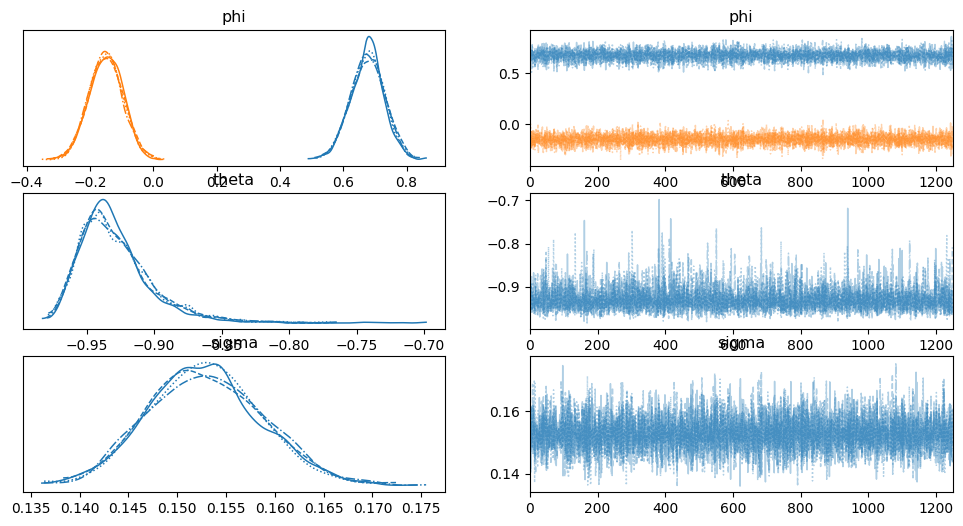

In [7]:
az.plot_trace(ritorno['inference_data'], var_names=['phi','theta','sigma'])

array([[<AxesSubplot: title={'center': 'phi\n0'}>,
        <AxesSubplot: title={'center': 'phi\n1'}>,
        <AxesSubplot: title={'center': 'theta\n0'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'gamma_phi\n0'}>,
        <AxesSubplot: title={'center': 'gamma_phi\n1'}>],
       [<AxesSubplot: title={'center': 'gamma_th\n0'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

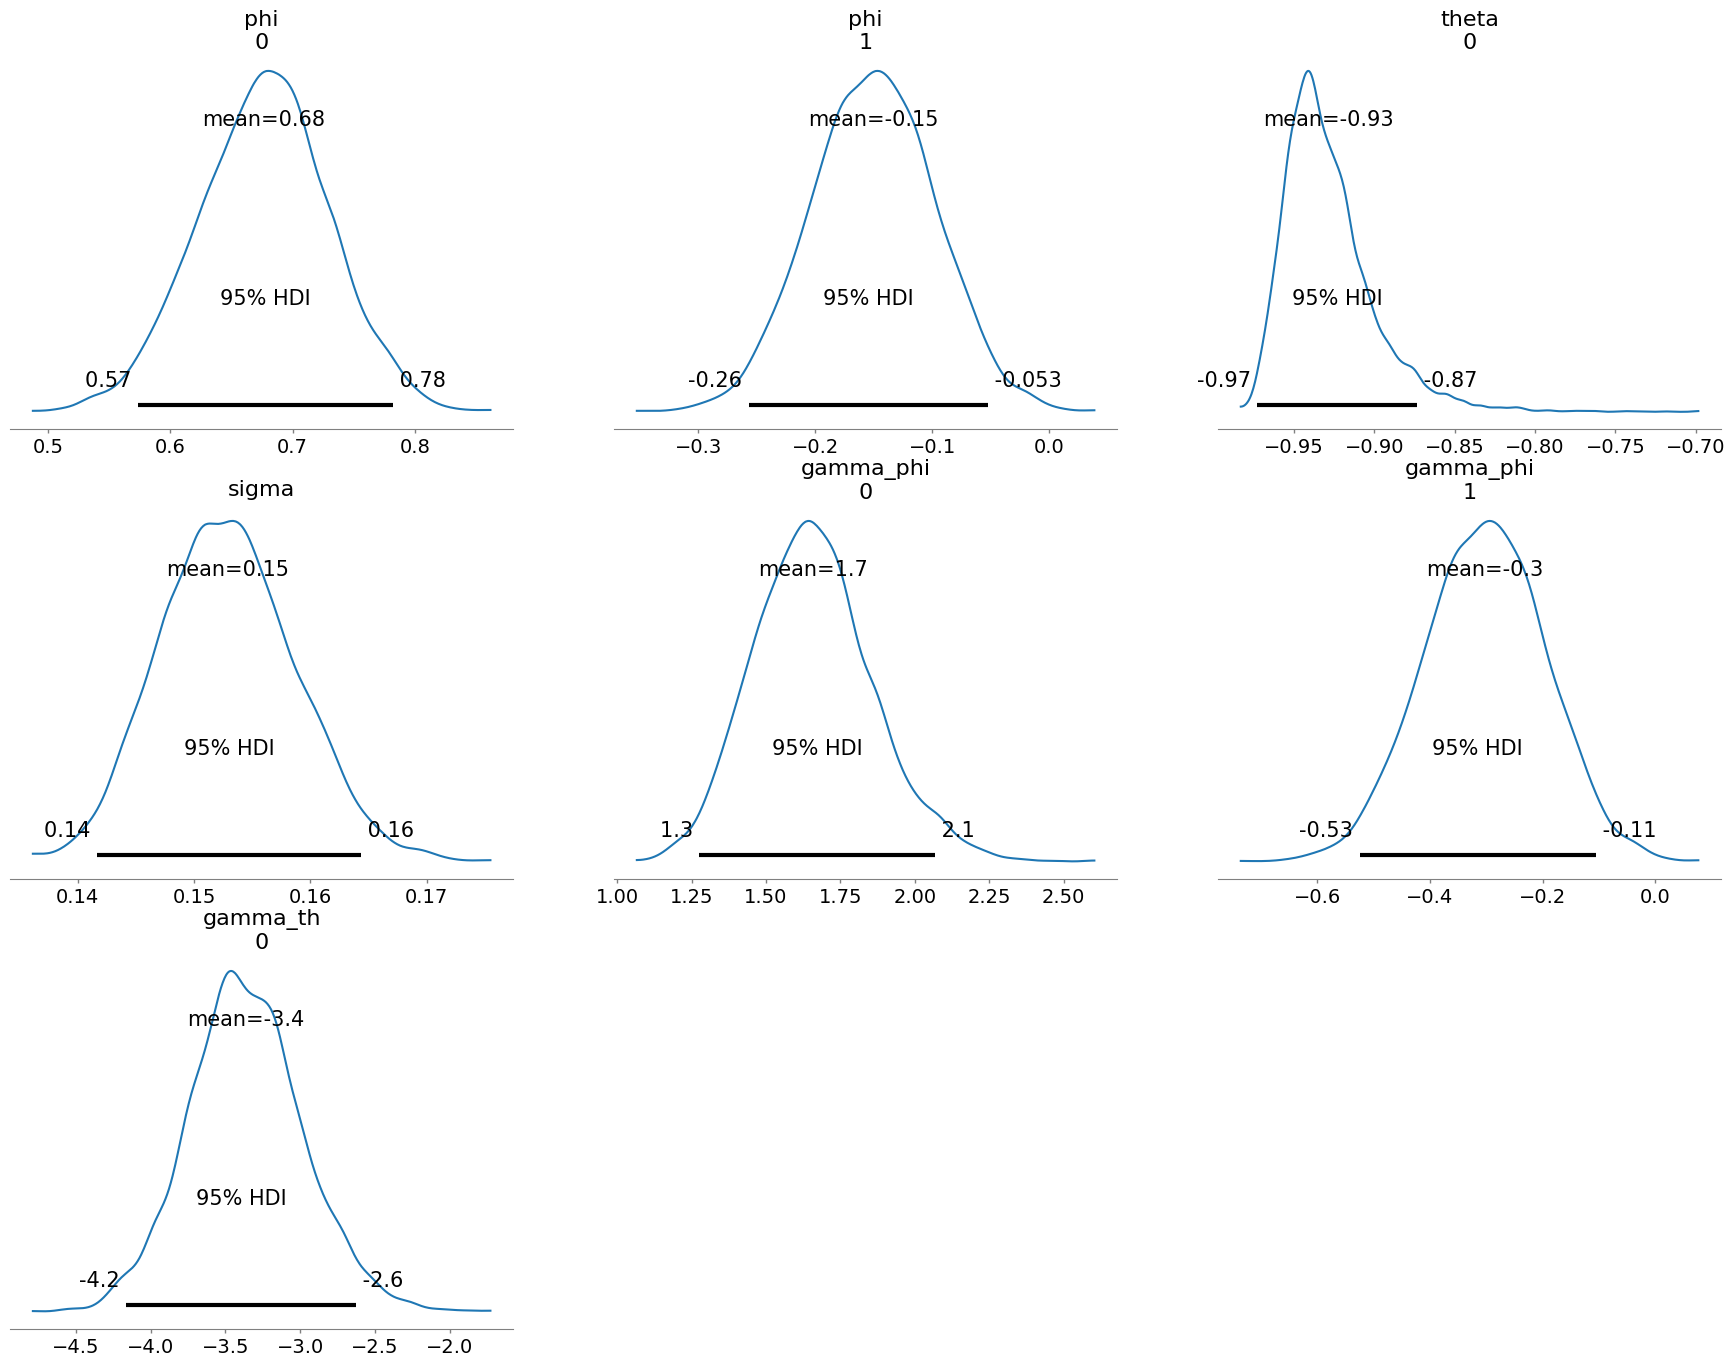

In [8]:
az.plot_posterior(ritorno['inference_data'], var_names=['phi','theta','sigma','gamma_phi','gamma_th'], hdi_prob=0.95)

array([[<AxesSubplot: title={'center': '2018-02-14'}>,
        <AxesSubplot: title={'center': '2018-05-02'}>,
        <AxesSubplot: title={'center': '2018-09-19'}>],
       [<AxesSubplot: title={'center': '2018-10-17'}>,
        <AxesSubplot: title={'center': '2018-10-18'}>,
        <AxesSubplot: title={'center': '2018-12-31'}>]], dtype=object)

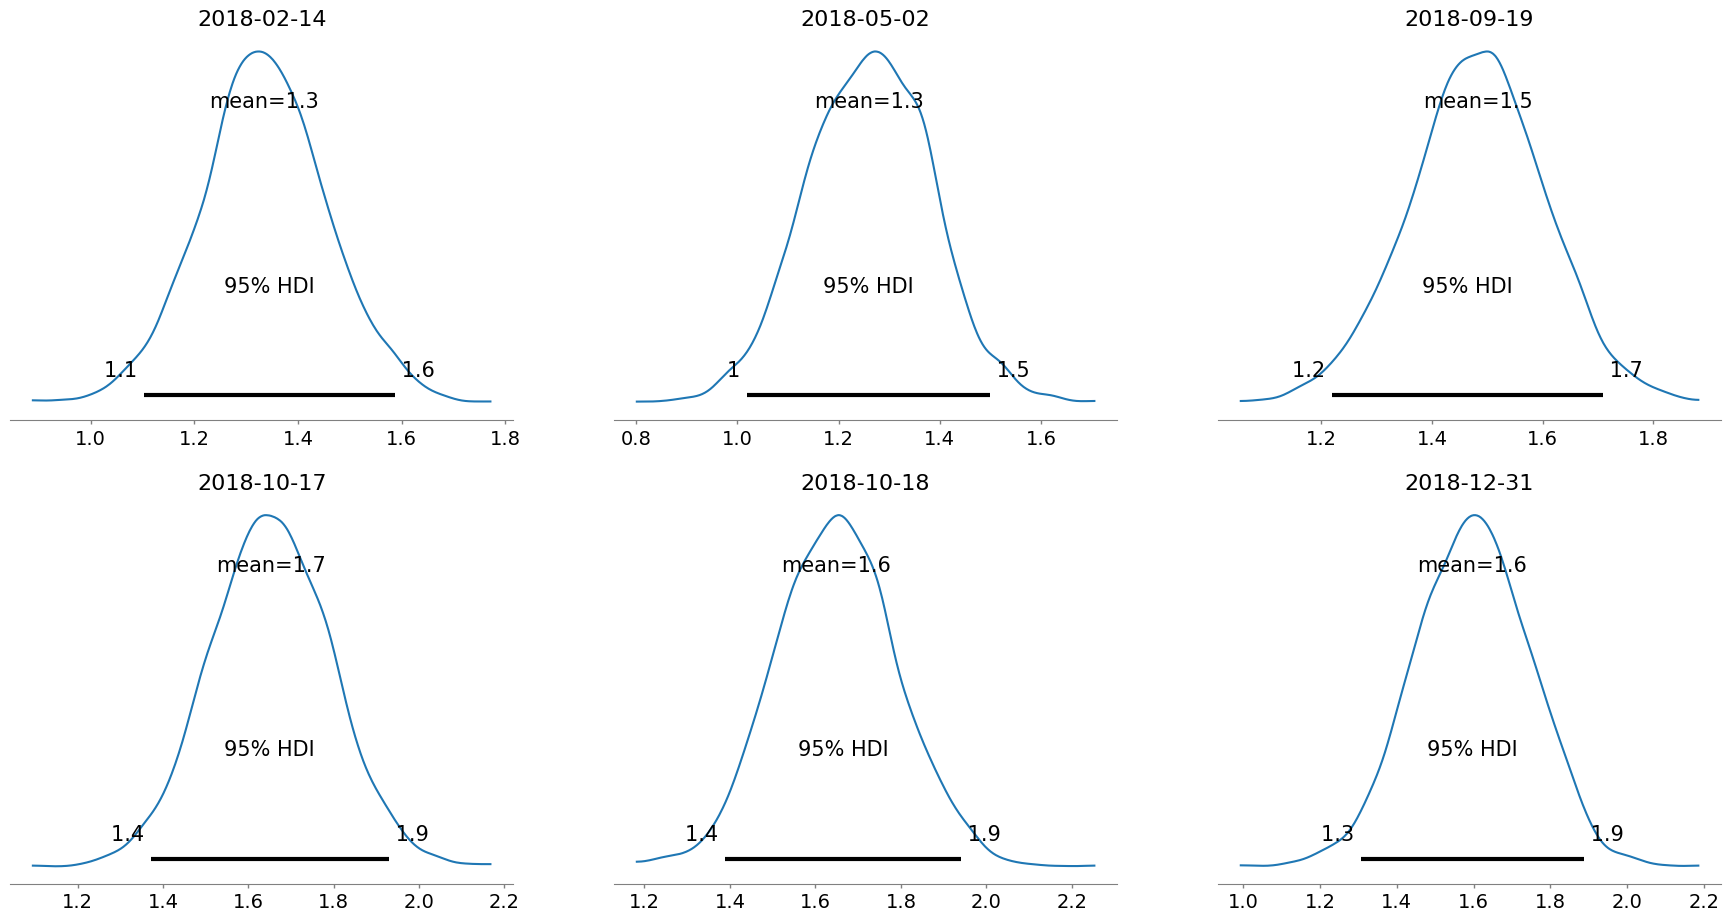

In [9]:
az.plot_posterior(ritorno['reconstructed_y'], hdi_prob=0.95)

<AxesSubplot: xlabel='Date', ylabel='S. LAZZARO'>

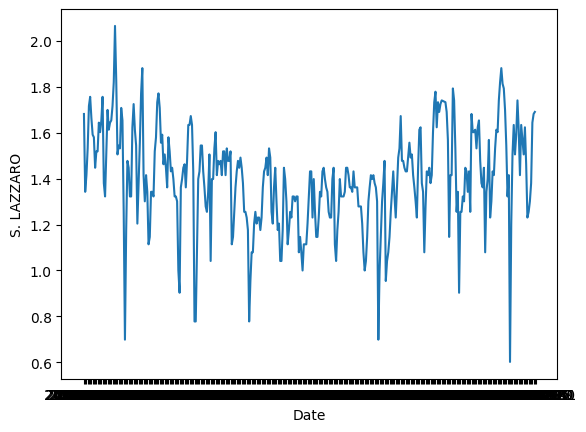

In [10]:
sns.lineplot(df[stazione])

In [11]:
y_post_predictive = np.reshape(ritorno['inference_data'].posterior.y_post_pred.values, (-1,365))

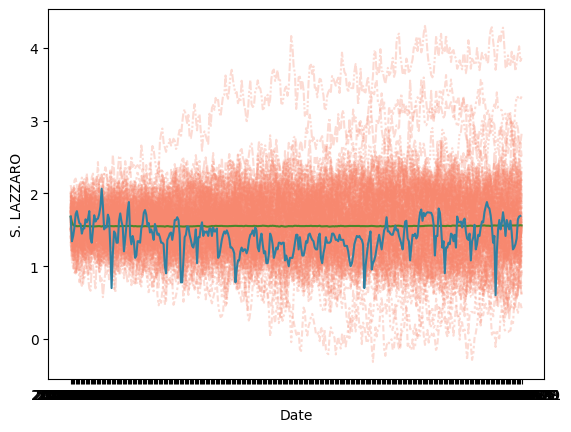

In [12]:
col_map = sns.light_palette((20,90,65), input='husl', as_cmap=True)
ax = plt.subplot(1,1,1)


sns.lineplot(np.transpose(y_post_predictive[0::50,:]))

sns.lineplot(np.mean(y_post_predictive, axis=0))

sns.lineplot(df[stazione])    

ax.get_legend().remove()
col_vals = np.linspace(1,255,num=len(df.columns))
index = 0
for line in ax.get_lines():
    if(index == len(ax.get_lines()) - 1):
        col_map = sns.dark_palette((230,90,65), input='husl', as_cmap=True)
        line.set_c(col_map(175))
        continue
    if(index == len(ax.get_lines()) - 2):
        col_map = sns.dark_palette((120,90,65), input='husl', as_cmap=True)
        line.set_c(col_map(175))
        index += 1
        continue

    #line.set_c(col_map(int(np.round(col_vals[index]))))
    line.set_c(col_map(220))
    line.set_alpha(0.3)
    index += 1


plt.show()